In [2]:
#ipython magic
%reset -f
# change inline to notebook to get interactive (but slow) plots
%matplotlib inline 
%load_ext autoreload
%autoreload 2

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# general imports
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## put your path to your vape repo here 
path_to_vape = '/home/jamesrowland/Documents/Code/Vape/'
sys.path.append(path_to_vape)
sys.path.append(os.path.join(path_to_vape, 'utils'))

In [5]:
# notebook specific imports
import pickle
import utils_funcs as utils
import re

In [6]:
# global plotting params
sns.set()
sns.set_style('white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'lines.markersize': 15}

plt.rc("axes.spines", top=False, right=False) # despine

plt.rcParams.update(params)


In [7]:
def trial_outcomes(outcome):

    go_outcome = []
    nogo_outcome = []

    for t in outcome:
        if t == 'hit':
            go_outcome.append(True)
        elif t == 'miss':
            go_outcome.append(False)
        elif t =='cr':
            nogo_outcome.append(False)
        elif t == 'fp':
            nogo_outcome.append(True)

    go_outcome = np.array(go_outcome)
    nogo_outcome = np.array(nogo_outcome)
    
    return go_outcome, nogo_outcome

In [8]:
def get_subset_dprime(run):

    go_outcome, nogo_outcome = trial_outcomes(run.outcome)
    trial_subsets = []

    for i, info in enumerate(run.trial_info):
        if 'Nogo Trial' in info:
            continue
        elif 'all_cells_stimulated' in info:
            trial_subsets.append(150)
        elif 'Subset cells experiment' in info:
            trial_subset = int(re.search('(?<=stimulating )(.*)(?= cells)', info).group(0))
            trial_subsets.append(trial_subset)

    trial_subsets = np.array(trial_subsets)
    subsets = np.sort(np.unique(trial_subsets))
        
    fp_rate = sum(nogo_outcome) / len(nogo_outcome)
    
    subset_outcome = []

    for sub in subsets:
        subset_idx = np.where(trial_subsets == sub)[0]
        if len(subset_idx) < 10:
            subset_outcome.append(np.nan)
        else:
            subset_outcome.append(sum(go_outcome[subset_idx]) / len(subset_idx))

    subsets_dprime = [utils.d_prime(outcome, fp_rate) for outcome in subset_outcome]
    
    return subsets, subsets_dprime
    

In [9]:
def subsets_hit_fp(run):
    
    '''hacky function code copied from above to get out
       dprimes calculated across all sessions'''
    
    go_outcome, nogo_outcome = trial_outcomes(run.outcome)
    
    trial_subsets = []

    for i, info in enumerate(run.trial_info):
        if 'Nogo Trial' in info:
            continue
        elif 'all_cells_stimulated' in info:
            trial_subsets.append(150)
        elif 'Subset cells experiment' in info:
            trial_subset = int(re.search('(?<=stimulating )(.*)(?= cells)', info).group(0))
            trial_subsets.append(trial_subset)

    trial_subsets = np.array(trial_subsets)
    global subsets # lol
    subsets = np.sort(np.unique(trial_subsets))
    assert len(trial_subsets) == len(go_outcome)
    
    subby = [] # list of lists
    
    for sub in subsets:
        subset_idx = np.where(trial_subsets == sub)[0]
        subby.append(go_outcome[subset_idx])
        
        
    fp_rate = sum(nogo_outcome) / len(nogo_outcome)
    
    return subby, fp_rate
        

In [10]:
mouse_id = 'J048'
run_numbers = [27,28,29,30,32]

# mouse_id = 'RL048'
# run_numbers = [23, 24, 25, 28, 29]

In [10]:
fp_rates = []


for i, run_number in enumerate(run_numbers):
    pkl_path = os.path.join(path_to_vape, 'run_pkls', mouse_id, 'run{}.pkl'.format(run_number))
    
    with open(pkl_path, 'rb') as f:
        run = pickle.load(f)
        
    subby, fp_rate = subsets_hit_fp(run)
    
    fp_rates.append(fp_rate)
        
        
        
    if i == 0:
        
        all_subbys = subby
    
    else:
        
        for i, lst in enumerate(all_subbys):
            
            all_subbys[i] = np.append(lst, subby[i])
            
        
        


In [11]:
# change this need to sum and divide by len across all sessions
fp_rate = np.mean(fp_rates)
fp_rate

0.3699193336695924

In [12]:
hit_rates = []

dprimes = []

for i,sub in enumerate(all_subbys):
    hit_rate = sum(sub) / len(sub)
    print(len(sub))
    dprimes.append(utils.d_prime(hit_rate, fp_rate))
    


91
70
65
66
59
62
370


Text(0.5, 1.0, 'J048 number of sessions = 5')

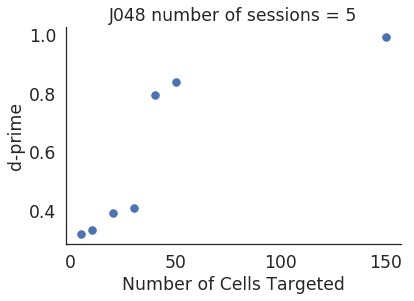

In [13]:
plt.plot(subsets, dprimes, '.')
plt.xlabel('Number of Cells Targeted')
plt.ylabel('d-prime')
plt.title('{} number of sessions = {}'.format(mouse_id, len(fp_rates)))

In [7]:
from termcolor import colored, cprint
cprint('Hello', attrs=['bold'])

Hello


In [14]:
1/0

ZeroDivisionError: division by zero

In [ ]:
# 

In [ ]:
mouse_id = 'J048'
run_numbers = [27,28,29,30]
#run_numbers = [30]
# mouse_id = 'RL048'
# run_numbers = [23,24,25]

across_sessions = []

for run_number in run_numbers:

    pkl_path = os.path.join(path_to_vape, 'run_pkls', mouse_id, 'run{}.pkl'.format(run_number))

    with open(pkl_path, 'rb') as f:
        run = pickle.load(f)
        
    subsets, subsets_dprime = get_subset_dprime(run)
    
    across_sessions.append(subsets_dprime)
    
across_sessions = np.array(across_sessions)    

In [ ]:

meaned = np.nanmean(across_sessions, 0)
across_sessions.shape
across_sessions[:,3]

In [ ]:
plt.plot(subsets, meaned, '.')
plt.xlabel('Number of cells targeted')
plt.ylabel('d-prime')
plt.title(mouse_id)
plt.ylim((0,1.5))
plt.savefig(os.path.join(path_to_vape, 'figures', '{}_easytest-dprime.png'.format(mouse_id)),  bbox_inches="tight")